<a href="https://colab.research.google.com/github/Valerie231/ML_homeworks/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('medical-charges.csv')

In [4]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


На разі тільки лінійна регресія приходить на думку(

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [6]:
fig = px.histogram(df,
                   x='charges',
                   color='sex',
                   marginal='box',
                   title='Charges by Sex')
fig.update_layout(bargap=0.1)
fig.show()

Чоловіки мають в загальному набагато вищі збори, ніж жінки - вищий 75 перцентиль та в цілому ширший розподіл

In [7]:
fig = px.histogram(df,
                   x='charges',
                   color='region',
                   marginal='box',
                   title='Charges by Region')
fig.update_layout(bargap=0.1)
fig.show()

Південно-східний регіон має найвищі показники по медичним зборам

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [8]:
fig = px.histogram(df,
                   x='region',
                   color='smoker',
                   marginal='box',
                   title='Smokers by Region')
fig.update_layout(bargap=0.1)
fig.show()

В південно-східному регіоні теж більша частка курців порівнюючи з іншими

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [9]:
fig = px.violin(df['charges'], df['children'],
                title='Charges vs. children')
fig.update_layout(bargap=0.1)
fig.show()

Variance of charges is higher for people who have smaller number of children

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [10]:
non_smoker_df = df[df.smoker == 'no']

In [11]:
def estimate_charges(age, w, b):
    return w * age + b

In [12]:
def try_parameters(non_smoker_df, w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

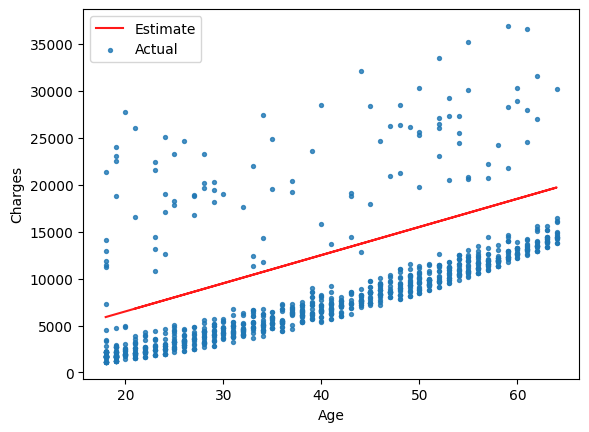

In [13]:
try_parameters(non_smoker_df, 300, 500)

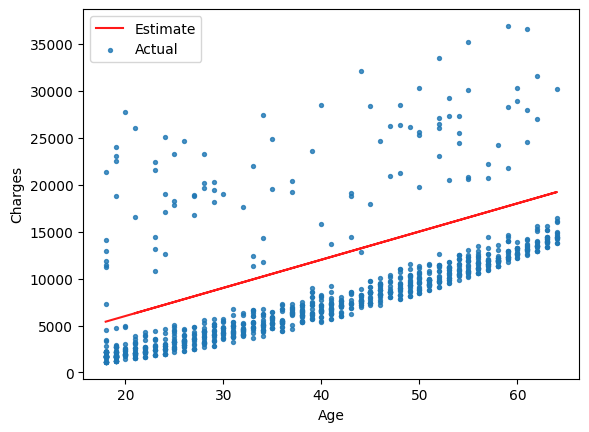

In [14]:
try_parameters(non_smoker_df, 300, 10)

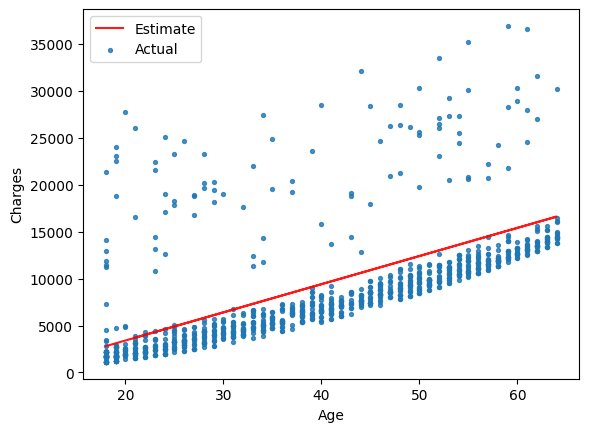

In [15]:
try_parameters(non_smoker_df, 300, -2600)

Остання пара параметрів найкраще описує дані

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [16]:
import numpy as np

In [17]:
def rmse (w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  est_charges = estimate_charges(ages, w, b)
  return (np.sqrt(np.sum((est_charges - target)**2)/len(target)))

In [19]:
rmse(300, 50), rmse(300, 10), rmse(300, -2600)

(5807.370870448704, 5783.826568152254, 4749.946361344432)

Найнижче значення що вдалося досягти - 4750

Найнижче можливе - мабуть нижче за дане але більше за нуль, оскільки точки розкидані і немає ідеальної лінійної залежності, тому завжди буде помилка

Загальна стратегія яку я б обрала- створити алгоритм який би поступово змінював параметри, поки не досягнув би найменшого можливого значення помилки